# Gender Recognition By Voice

In [50]:
from scipy.stats import zscore
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('Set2')

In [51]:
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None) 

In [52]:
df = pd.read_csv('voice_train.csv')

In [53]:
df.head(10)

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,765,0.162337,0.058206,0.174065,0.100225,0.196512,0.096287,2.127226,7.815129,0.921533,0.426868,0.195134,0.162337,0.095852,0.016754,0.235294,0.406033,0.046875,3.484375,3.437500,0.155348,male
1,3071,0.161653,0.057435,0.170138,0.157522,0.182929,0.025407,6.968850,60.968047,0.870409,0.459881,0.171014,0.161653,0.163486,0.015601,0.204082,0.595161,0.170898,3.979492,3.808594,0.209073,female
2,1546,0.165290,0.061891,0.135071,0.118468,0.225176,0.106708,2.631865,12.629116,0.918897,0.413620,0.129191,0.165290,0.120050,0.035088,0.222222,0.458577,0.087891,1.015625,0.927734,0.459834,male
3,410,0.188100,0.055735,0.206028,0.130493,0.229470,0.098977,1.538406,5.145753,0.914325,0.398674,0.222698,0.188100,0.108470,0.021305,0.145455,0.493229,0.125000,4.734375,4.609375,0.105202,male
4,2689,0.187497,0.044226,0.190071,0.156800,0.215435,0.058635,1.653083,5.839465,0.907477,0.337921,0.196000,0.187497,0.154529,0.048338,0.279070,1.113502,0.023438,8.765625,8.742188,0.103095,female
5,25,0.164700,0.075362,0.147018,0.118698,0.240475,0.121777,4.208608,43.681885,0.940669,0.604020,0.059965,0.164700,0.082963,0.015640,0.253968,0.143353,0.007812,1.062500,1.054688,0.125926,male
6,2641,0.204961,0.036409,0.204117,0.191149,0.225729,0.034580,2.813954,12.806080,0.862543,0.259556,0.202676,0.204961,0.154035,0.048000,0.277457,1.505701,0.023438,9.070312,9.046875,0.154631,female
7,1913,0.078847,0.068473,0.054163,0.022843,0.127637,0.104794,2.422417,9.575713,0.930185,0.581113,0.024491,0.078847,0.138373,0.016293,0.271186,0.436663,0.007812,5.328125,5.320312,0.106574,female
8,1971,0.228903,0.041596,0.236905,0.208646,0.259277,0.050631,2.073639,7.742316,0.866409,0.163200,0.258570,0.228903,0.177575,0.019925,0.275862,0.429688,0.007812,2.718750,2.710938,0.148991,female
9,439,0.183125,0.059820,0.202360,0.132979,0.227552,0.094572,2.120305,8.974592,0.925890,0.528520,0.225900,0.183125,0.114168,0.034934,0.183908,0.627298,0.156250,5.101562,4.945312,0.158610,male


In [54]:
df.describe()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000,2851.000000
mean,1591.565416,0.180923,0.057143,0.185722,0.140349,0.224730,0.084381,3.118469,35.808329,0.895312,0.408473,0.165481,0.180923,0.142891,0.036834,0.258968,0.833608,0.052634,5.075745,5.023111,0.173933
std,909.939169,0.029796,0.016588,0.036175,0.048628,0.023509,0.042728,4.163727,131.430900,0.044795,0.176880,0.076918,0.029796,0.032191,0.019182,0.029806,0.525565,0.062982,3.526201,3.525193,0.119463
min,1.000000,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.108696,0.007812,0.004883,0.007812,0.000000,0.000000
25%,808.500000,0.163739,0.042082,0.169726,0.111139,0.208756,0.042663,1.638410,5.604497,0.862190,0.259191,0.118100,0.163739,0.117578,0.018223,0.253968,0.423799,0.007812,2.207031,2.183594,0.099591
50%,1590.000000,0.184848,0.059151,0.190067,0.140229,0.225729,0.094235,2.183320,8.255809,0.901840,0.396548,0.186667,0.184848,0.140678,0.046921,0.271186,0.767578,0.023438,4.992188,4.968750,0.139159
75%,2382.500000,0.199061,0.066891,0.210650,0.175690,0.243700,0.114208,2.932962,13.649354,0.928727,0.533495,0.221341,0.199061,0.169593,0.047904,0.277457,1.180411,0.070312,7.078125,7.042969,0.209525
max,3167.000000,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [55]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        2851 non-null   int64  
 1   meanfreq  2851 non-null   float64
 2   sd        2851 non-null   float64
 3   median    2851 non-null   float64
 4   Q25       2851 non-null   float64
 5   Q75       2851 non-null   float64
 6   IQR       2851 non-null   float64
 7   skew      2851 non-null   float64
 8   kurt      2851 non-null   float64
 9   sp.ent    2851 non-null   float64
 10  sfm       2851 non-null   float64
 11  mode      2851 non-null   float64
 12  centroid  2851 non-null   float64
 13  meanfun   2851 non-null   float64
 14  minfun    2851 non-null   float64
 15  maxfun    2851 non-null   float64
 16  meandom   2851 non-null   float64
 17  mindom    2851 non-null   float64
 18  maxdom    2851 non-null   float64
 19  dfrange   2851 non-null   float64
 20  modindx   2851 non-null   floa

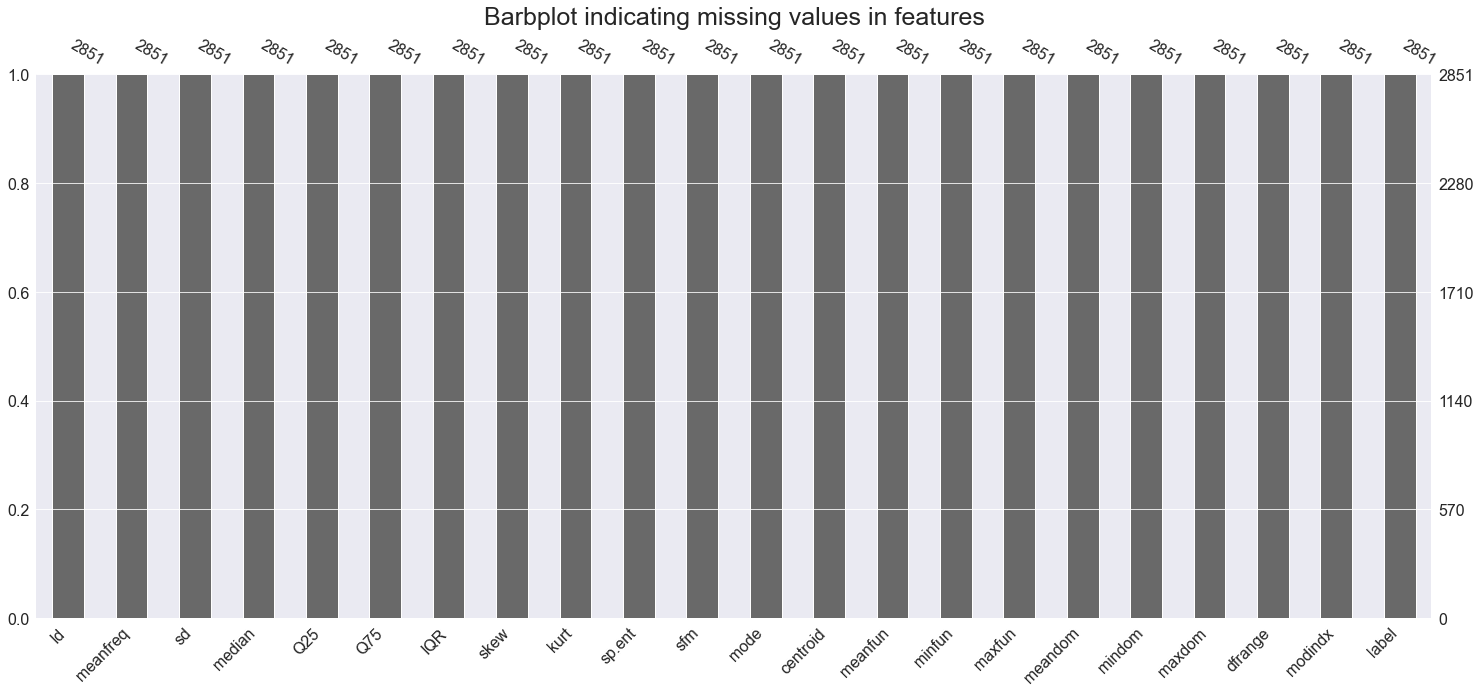

Missing Values in Features



<Figure size 432x288 with 0 Axes>

In [56]:
cols = []
msno.bar(df)
plt.title('Barbplot indicating missing values in features',fontdict={'fontsize':25},pad=50.0)
plt.xticks(rotation=-30)
plt.show()
print('Missing Values in Features',end='\n\n')
for i,j in enumerate(df.isnull().sum()):
    if '%.1f'%((j/df.shape[0])*100) !='0.0':
        print(df.columns[i],'%.1f'%((j/df.shape[0])*100)+'%')
        cols.append(df.columns[i])
plt.savefig('missing_files.png',dpi=300,bbox_inches='tight')

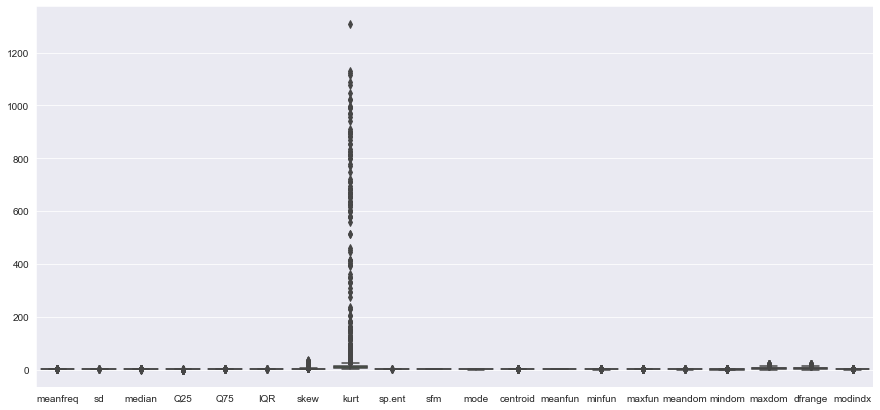

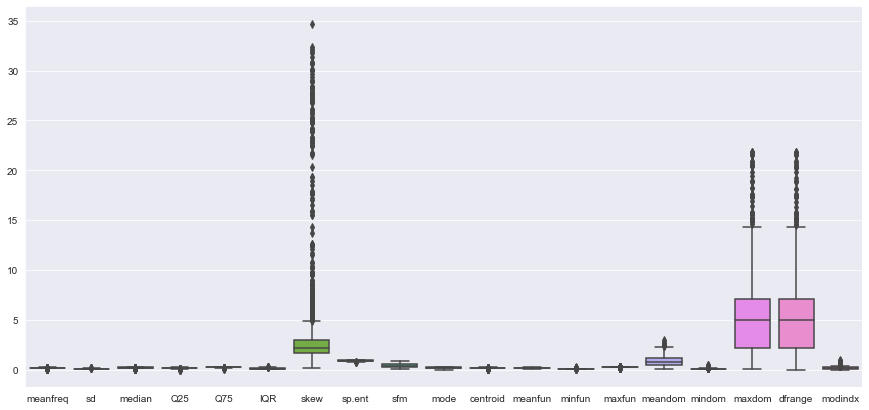

In [57]:
lst = [df.drop(labels=['Id'],axis=1),df.drop(labels=['Id','kurt'],axis=1)]
for i in lst:
    plt.figure(figsize=(15,7))
    sns.boxplot(data=i)
    plt.show()

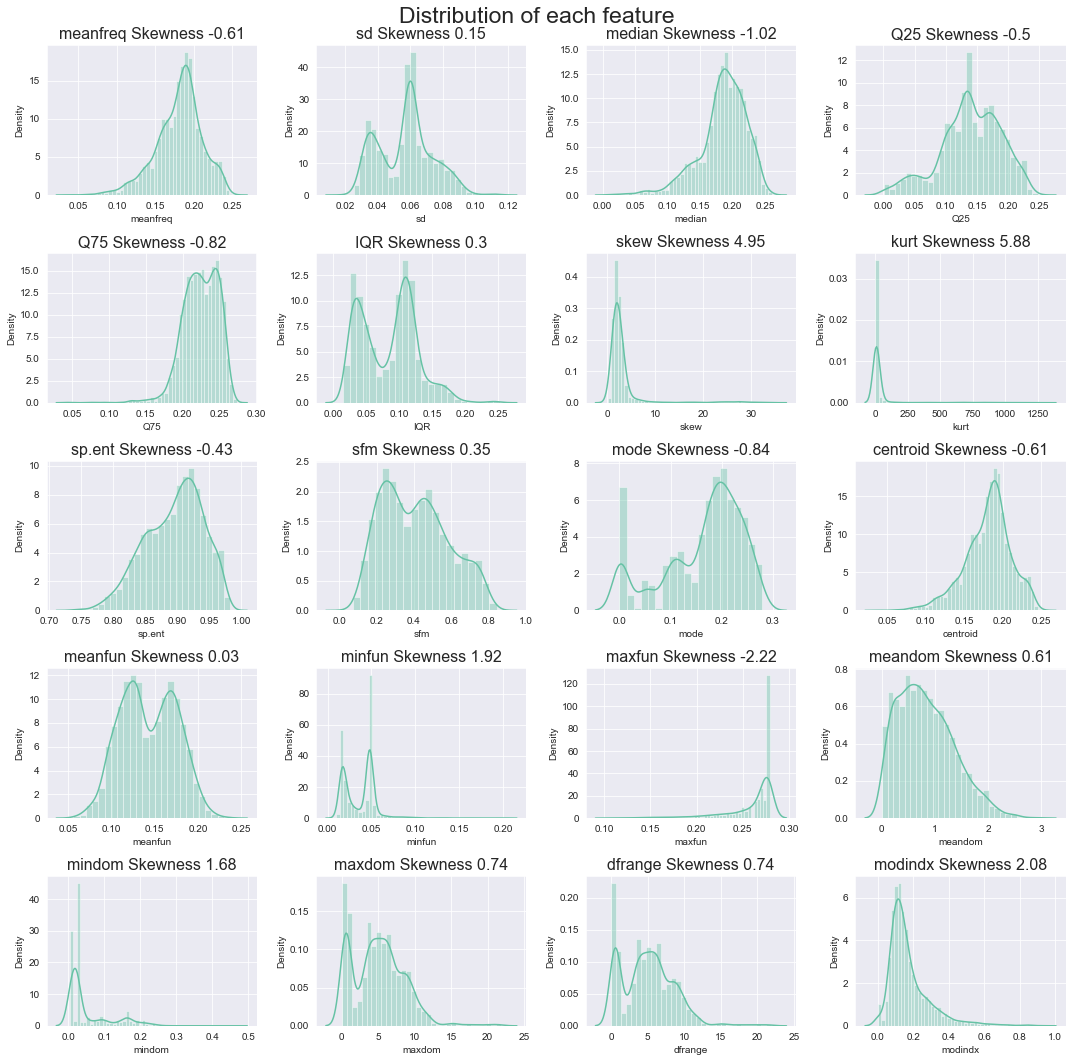

In [58]:
cols = df.describe().columns.tolist()
fig,ax = plt.subplots(5,4,figsize=(15,15))
b = 1
for i in range(0,5):
    for j in range(0,4):
        a = sns.distplot(df[cols[b]],ax = ax[i,j])
        a.set_title(cols[b]+" Skewness "+str(round(df[cols[b]].skew(axis = 0, skipna = True),2)) ,fontdict={'fontsize':16})
        b = b+1
        fig.suptitle('Distribution of each feature',size = 23)
fig.tight_layout()
plt.show()

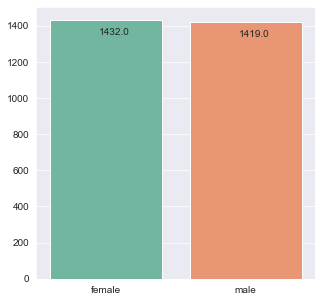

In [66]:
plt.figure(figsize=(5,5))

a = sns.barplot(x = df['label'].value_counts().index,y =df['label'].value_counts().values)
for p in a.patches:
            a.annotate('{}'.format(p.get_height()), (p.get_x()+.35, p.get_height()-80.8))
plt.show()

In [67]:
df.skew(axis = 0, skipna = True)

Id         -0.001228
meanfreq   -0.608137
sd          0.145654
median     -1.015778
Q25        -0.495925
Q75        -0.821695
IQR         0.299418
skew        4.946760
kurt        5.881449
sp.ent     -0.429966
sfm         0.350951
mode       -0.839555
centroid   -0.608137
meanfun     0.032909
minfun      1.916373
maxfun     -2.215242
meandom     0.610751
mindom      1.683842
maxdom      0.738665
dfrange     0.740749
modindx     2.075593
dtype: float64